In [1]:
import pandas as pd
import os

In [4]:
lego = pd.read_csv('./datasets/lego_sets.csv')
parent = pd.read_csv('./datasets/parent_themes.csv')
sets = pd.read_csv('./datasets/sets.csv')
themes = pd.read_csv('./datasets/themes.csv')

In [5]:
lego.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [6]:
parent.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [7]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [14]:
#### What percentage of all licensed sets ever released were Star Wars themed?
merged = lego.merge(parent, left_on='parent_theme', right_on='name')
merged.drop(columns='name_y', inplace=True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [19]:
licensed = merged[merged['is_licensed']]
licensed = licensed.dropna(subset=['set_num'])
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [20]:
starWars = licensed[licensed['parent_theme'] == 'Star Wars']
starWars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [28]:
result = starWars.shape[0]/licensed.shape[0]*100
result = round(result, 2)
print(str(result) + '%')

51.65%


In [39]:
#### In which year was Star Wars not the most popular licensed theme in terms 
#### of number of sets released

licensedSorted = licensed.sort_values('year')
licensedSorted['count'] = 1

summedDF = licensedSorted.groupby(['year', 'parent_theme']).sum().reset_index()
summedDF.drop(columns='is_licensed', inplace=True)
maxDF = summedDF.sort_values('count', ascending=False).drop_duplicates(['year'])
maxDF.sort_values('year', inplace=True)
maxDF

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_15664\787510094.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summedDF = licensedSorted.groupby(['year', 'parent_theme']).sum().reset_index()


,year,parent_theme,num_parts,id,count
0,1999,Star Wars,1384.0,2054,13
2,2000,Star Wars,2580.0,4108,26
4,2001,Star Wars,2949.0,2212,14
6,2002,Star Wars,4735.0,4424,28
9,2003,Star Wars,6660.0,5056,32
12,2004,Star Wars,1659.0,3160,20
16,2005,Star Wars,4730.0,4424,28
20,2006,Star Wars,2769.0,1738,11
24,2007,Star Wars,11361.0,2528,16
28,2008,Star Wars,6865.0,3634,23


In [65]:
#### Number of sets by year
cleanDF = merged[~merged['set_num'].isnull()]
cleanDF['count'] = 1
setsYear = cleanDF.groupby(['year']).sum().reset_index()[['year','count']]
setsYear.head()


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_15664\2269140095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDF['count'] = 1
C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_15664\2269140095.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  setsYear = cleanDF.groupby(['year']).sum().reset_index()[['year','count']]


,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12


In [51]:
import matplotlib.pyplot as plt

In [75]:
years = [year for year, df in cleanDF.groupby('year')]
yearsCount = cleanDF.groupby('year').count()

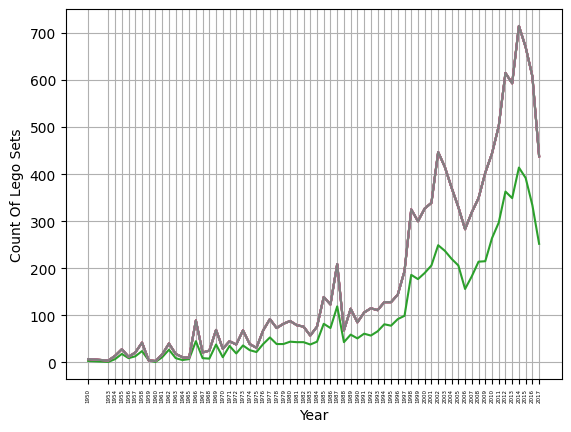

In [84]:
plt.plot(years, yearsCount)
plt.xticks(years, rotation='vertical', size=4)
plt.ylabel('Count Of Lego Sets')
plt.xlabel('Year')
plt.grid()